Import Required Libraries


In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('train.csv',encoding='unicode_escape')
train_data=df[['text','sentiment']]
train_data.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [5]:
train_data.describe()

,text,sentiment
count,27480,27481
unique,27480,3
top,"I`d have responded, if I were going",neutral
freq,1,11118


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27480 non-null  object
 1   sentiment  27481 non-null  object
dtypes: object(2)
memory usage: 429.5+ KB


In [7]:
train_data.isna().any()

text          True
sentiment    False
dtype: bool

In [8]:
train_data = train_data.dropna()

In [9]:
train_data.isna().any()

text         False
sentiment    False
dtype: bool

In [10]:
unique_col = train_data['sentiment'].unique()
print(unique_col)

['neutral' 'negative' 'positive']


In [11]:
dic = {unique_col[i]:i for i in range(3)}
print(dic)
train_data.replace(dic,inplace = True)
train_data.head()

{'neutral': 0, 'negative': 1, 'positive': 2}


,text,sentiment
0,"I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,1
2,my boss is bullying me...,1
3,what interview! leave me alone,1
4,"Sons of ****, why couldn`t they put them on t...",1


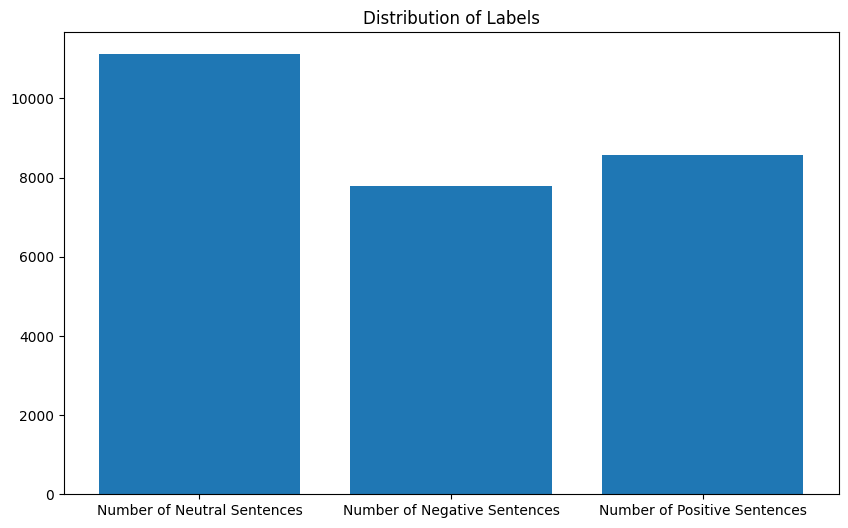

In [12]:
prior_0=len(train_data[train_data["sentiment"] == 0])
prior_1=len(train_data[train_data["sentiment"] == 1])
prior_2=len(train_data[train_data["sentiment"] == 2])

categories = ['Number of Neutral Sentences', 'Number of Negative Sentences', 'Number of Positive Sentences']
values = [prior_0,prior_1,prior_2]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, values)
plt.title('Distribution of Labels')
plt.show()

In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'\W+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('spanish')]
    # Join tokens back to string
    text = ' '.join(tokens)
    return text

# Apply preprocessing to the text column
train_data['text'] = train_data['text'].apply(preprocess_text)
print(train_data.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                text  sentiment
0                 i d have responded if i were going          0
1         sooo sad i will miss you here in san diego          1
2                                my boss is bullying          1
3                         what interview leave alone          1
4  sons of why couldn t they put them on the rele...          1


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=4000)
X = vectorizer.fit_transform(train_data['text']).toarray()
y = train_data['sentiment']

# Encode the target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [15]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
print(y)

[0 1 1 ... 2 2 0]


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0]
}

# Initialize the model
model = MultinomialNB()

# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Best cross-validated score
print(f"Best cross-validated score: {grid_search.best_score_}")

# Use the best estimator to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(classification_report(y_test,y_pred))


Best parameters: {'alpha': 1.0}
Best cross-validated score: 0.6381916034652628
Accuracy: 0.6366448326055313
              precision    recall  f1-score   support

           0       0.56      0.79      0.66      2236
           1       0.74      0.47      0.57      1572
           2       0.75      0.59      0.66      1688

    accuracy                           0.64      5496
   macro avg       0.68      0.62      0.63      5496
weighted avg       0.67      0.64      0.63      5496



In [19]:
import joblib

# Save the trained model and vectorizer
joblib.dump(best_model, 'naive_bayes_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Download the pickle files
from google.colab import files
files.download('naive_bayes_model.pkl')
files.download('tfidf_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>